In [5]:
#q1

import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt_tab')
nltk.download('stopwords')

corpus = """Sports play a vital role in promoting physical fitness and mental well-being.
They encourage teamwork, discipline, and perseverance among players of all ages.
Popular sports like football, cricket, and basketball unite people across different cultures and backgrounds.
Regular participation in sports helps reduce stress and boosts confidence.
Whether played professionally or just for fun, sports contribute to a healthier lifestyle.
They also provide entertainment and inspire millions of fans worldwide."""

corpus_clean = re.sub(r'[^\w\s]', '', corpus.lower())

sent_tokens = sent_tokenize(corpus)
word_tokens_nltk = word_tokenize(corpus_clean)

word_tokens_split = corpus_clean.split()

print("Using split():", word_tokens_split[:10])
print("Using word_tokenize():", word_tokens_nltk[:10])
print("\nDifference: word_tokenize() is smarter, handles punctuation, contractions, etc.\n")

stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in word_tokens_nltk if word not in stop_words]

fdist = FreqDist(filtered_tokens)

print("Word Frequency Distribution (after stopword removal):")
for word, freq in fdist.items():
    print(f"{word}: {freq}")


Using split(): ['sports', 'play', 'a', 'vital', 'role', 'in', 'promoting', 'physical', 'fitness', 'and']
Using word_tokenize(): ['sports', 'play', 'a', 'vital', 'role', 'in', 'promoting', 'physical', 'fitness', 'and']

Difference: word_tokenize() is smarter, handles punctuation, contractions, etc.

Word Frequency Distribution (after stopword removal):
sports: 4
play: 1
vital: 1
role: 1
promoting: 1
physical: 1
fitness: 1
mental: 1
wellbeing: 1
encourage: 1
teamwork: 1
discipline: 1
perseverance: 1
among: 1
players: 1
ages: 1
popular: 1
like: 1
football: 1
cricket: 1
basketball: 1
unite: 1
people: 1
across: 1
different: 1
cultures: 1
backgrounds: 1
regular: 1
participation: 1
helps: 1
reduce: 1
stress: 1
boosts: 1
confidence: 1
whether: 1
played: 1
professionally: 1
fun: 1
contribute: 1
healthier: 1
lifestyle: 1
also: 1
provide: 1
entertainment: 1
inspire: 1
millions: 1
fans: 1
worldwide: 1


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#q2
import re
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

corpus = """Sports play a vital role in promoting physical fitness and mental well-being.
They encourage teamwork, discipline, and perseverance among players of all ages.
Popular sports like football, cricket, and basketball unite people across different cultures and backgrounds.
Regular participation in sports helps reduce stress and boosts confidence.
Whether played professionally or just for fun, sports contribute to a healthier lifestyle.
They also provide entertainment and inspire millions of fans worldwide."""

words = re.findall(r'\b[a-zA-Z]+\b', corpus.lower())

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word not in stop_words]

stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Original Words (after stopword removal):")
print(filtered_words)
print("\nStemmed Words:")
print(stemmed_words)
print("\nLemmatized Words:")
print(lemmatized_words)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Original Words (after stopword removal):
['sports', 'play', 'vital', 'role', 'promoting', 'physical', 'fitness', 'mental', 'well', 'encourage', 'teamwork', 'discipline', 'perseverance', 'among', 'players', 'ages', 'popular', 'sports', 'like', 'football', 'cricket', 'basketball', 'unite', 'people', 'across', 'different', 'cultures', 'backgrounds', 'regular', 'participation', 'sports', 'helps', 'reduce', 'stress', 'boosts', 'confidence', 'whether', 'played', 'professionally', 'fun', 'sports', 'contribute', 'healthier', 'lifestyle', 'also', 'provide', 'entertainment', 'inspire', 'millions', 'fans', 'worldwide']

Stemmed Words:
['sport', 'play', 'vital', 'role', 'promot', 'physic', 'fit', 'mental', 'well', 'encourag', 'teamwork', 'disciplin', 'persever', 'among', 'player', 'age', 'popular', 'sport', 'like', 'footbal', 'cricket', 'basketbal', 'unit', 'peopl', 'across', 'differ', 'cultur', 'background', 'regular', 'particip', 'sport', 'help', 'reduc', 'stress', 'boost', 'confid', 'whether', 

In [7]:
#q3
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd

texts = [
    "Smart thermostats adapt to your habits and save energy automatically.",
    "The new electric bike folds easily and charges in under two hours.",
    "Cloud storage platforms now offer seamless backup with end-to-end encryption."
]

count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(texts)

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()

def get_top_keywords(tfidf_vector, feature_names, top_n=3):
    sorted_indices = np.argsort(tfidf_vector.toarray()[0])[::-1]
    top_features = [(feature_names[i], tfidf_vector[0, i]) for i in sorted_indices[:top_n]]
    return top_features

for i, text in enumerate(texts):
    tfidf_vector = tfidf_matrix[i]
    top_keywords = get_top_keywords(tfidf_vector, feature_names)
    print(f"\nText {i+1}: {text}")
    print("Top 3 keywords (TF-IDF):")
    for word, score in top_keywords:
        print(f"{word}: {score:.4f}")



Text 1: Smart thermostats adapt to your habits and save energy automatically.
Top 3 keywords (TF-IDF):
your: 0.3305
thermostats: 0.3305
smart: 0.3305

Text 2: The new electric bike folds easily and charges in under two hours.
Top 3 keywords (TF-IDF):
under: 0.2939
the: 0.2939
two: 0.2939

Text 3: Cloud storage platforms now offer seamless backup with end-to-end encryption.
Top 3 keywords (TF-IDF):
end: 0.5428
seamless: 0.2714
with: 0.2714


In [8]:
#q4

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re

text1 = "Artificial Intelligence (AI) involves creating machines that can perform tasks that typically require human intelligence. AI systems use algorithms, machine learning, and data to recognize patterns and make decisions. These systems can improve their performance over time as they process more information. AI has wide applications in fields such as healthcare, finance, and transportation."
text2 = "Blockchain is a decentralized, distributed ledger technology that securely records transactions across multiple computers. Each block in the chain contains a record of transactions, and once added, it cannot be altered. This ensures transparency and security in processes like cryptocurrency transactions, supply chain management, and voting systems. Blockchain's potential extends beyond financial applications to many industries."

def preprocess(text):
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

text1_tokens = preprocess(text1)
text2_tokens = preprocess(text2)

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

jaccard_sim = jaccard_similarity(set(text1_tokens), set(text2_tokens))

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])[0][0]

print("Jaccard Similarity:", jaccard_sim)
print("Cosine Similarity:", cosine_sim)


Jaccard Similarity: 0.06818181818181818
Cosine Similarity: 0.13270179341703273


Review: This product is amazing! It works just as described and the quality is excellent.
Polarity: 0.875, Subjectivity: 0.95, Sentiment: Positive

Review: I am disappointed with the service. The product didn't meet my expectations.
Polarity: -0.75, Subjectivity: 0.75, Sentiment: Negative

Review: The product is okay, but nothing special. I expected a little more.
Polarity: 0.2139285714285714, Subjectivity: 0.49428571428571433, Sentiment: Positive

Review: Fantastic! I love it. Definitely recommend it to everyone.
Polarity: 0.3333333333333333, Subjectivity: 0.6666666666666666, Sentiment: Positive

Review: I didn't like it at all. The features are not as described and it broke easily.
Polarity: 0.43333333333333335, Subjectivity: 0.8333333333333334, Sentiment: Positive

Review: It’s decent, but I have had better products in the same category.
Polarity: 0.2222222222222222, Subjectivity: 0.4305555555555555, Sentiment: Positive



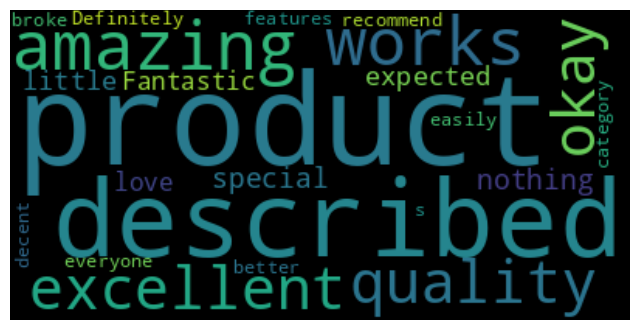

In [1]:
#q5
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = [
    "This product is amazing! It works just as described and the quality is excellent.",
    "I am disappointed with the service. The product didn't meet my expectations.",
    "The product is okay, but nothing special. I expected a little more.",
    "Fantastic! I love it. Definitely recommend it to everyone.",
    "I didn't like it at all. The features are not as described and it broke easily.",
    "It’s decent, but I have had better products in the same category."
]

positive_reviews = []

for review in reviews:
    text_blob = TextBlob(review)
    polarity = text_blob.sentiment.polarity
    subjectivity = text_blob.sentiment.subjectivity

    if polarity > 0:
        sentiment_label = "Positive"
        positive_reviews.append(review)
    elif polarity < 0:
        sentiment_label = "Negative"
    else:
        sentiment_label = "Neutral"

    print(f"Review: {review}\nPolarity: {polarity}, Subjectivity: {subjectivity}, Sentiment: {sentiment_label}\n")

wordcloud = WordCloud().generate(' '.join(positive_reviews))

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [11]:
#q6

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

paragraph = (
    "Technology is evolving rapidly and changing the way we interact with the world. "
    "Artificial Intelligence, machine learning, and automation are now part of our daily lives. "
    "From voice assistants to smart cars, these innovations make tasks easier and more efficient. "
    "The digital transformation is not only limited to businesses but is also impacting education, healthcare, and entertainment. "
    "Staying updated with these advancements is crucial for both individuals and organizations to thrive in a competitive environment."
)

tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
token_list = tokenizer.texts_to_sequences([paragraph])[0]

for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_seq_len = max([len(x) for x in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len - 1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X, y, epochs=200, verbose=1)

def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len - 1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

print(generate_text("technology", 10))


Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.0000e+00 - loss: 4.1430
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.0768 - loss: 4.1383
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0650 - loss: 4.1336
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0689 - loss: 4.1288
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0572 - loss: 4.1098
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0728 - loss: 4.0560
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0650 - loss: 4.0592
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0728 - loss: 4.0202
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.0533 - loss: 4.0293
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.0846 - loss: 3.9829
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0494 - loss: 4.0342
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0572 